In [5]:
#LIBRARIES IMPORT
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import patches
from matplotlib import rc
import numpy as np
from collections import deque
rc('animation', html='jshtml')

In [4]:
#FUNCTION DEFINITION

#update_frame: updates the position in the animation of the ball, beam and trace updating also the time. The trace can be useful to track the trajectory of the ball. This function is used inside animate to update each frame.
def update_frame( i , theta , xp , ball_radius , beam_length , time_text , ball , trace , line , history_x , history_y , time_template , t):

        #update of beam position
        x = [-(beam_length/2)*np.cos(theta[i]),(beam_length/2)*np.cos(theta[i])]
        y = [-(beam_length/2)*np.sin(theta[i]),(beam_length/2)*np.sin(theta[i])]
        line.set_xdata(x)
        line.set_ydata(y)

        #time generation
        time_text.set_text(time_template % (i*t))

        #update of ball position
        xc = xp[i]*np.cos(theta[i])-ball_radius*np.sin(theta[i])
        yc = xp[i]*np.sin(theta[i])+ball_radius*np.cos(theta[i])

        ball.set_center(( xc , yc ))

        #update trace of ball position
        if i == 0:
            history_x.clear()
            history_y.clear()

        history_x.appendleft(xc)
        history_y.appendleft(yc)

        trace.set_data(history_x, history_y)

        return None

In [5]:
# animate: It initializes and runs the animation. The arguments are:
#   x_limit:      limit of the plot on the x-axis (symmetric)
#   y_limit:      limit of the plot on the y-axis (symmetric)
#   history_len:  number of points stored in the trace memory [int]
#   ball_radius:  radius of the ball [float]
#   beam_length:  length of the beam [float]
#   t:            time between two frames (meaning two time instants of the dynamics)
#   theta:        temporal values of the angle of the beam [np.array]
#   theta:        temporal values of the position of the ball on the beam [np.array]

def animate( x_limit , y_limit , history_len , ball_radius , beam_length , t , theta , xp):

    # Figure init
    figure, ax = plt.subplots()

    # Setting limits for x and y axis
    ax.set_xlim(-x_limit , x_limit)
    ax.set_ylim(-y_limit , y_limit)

    # Line, trace, circle and time label init
    line,  = ax.plot(1, 1)

    history_x, history_y = deque(maxlen=history_len), deque(maxlen=history_len)
    trace, = ax.plot([], [], '.-', lw=1, ms=2)

    c = patches.Circle((0,ball_radius), ball_radius, figure=figure)
    ax.add_patch(c)

    time_template = 'time = %.1fs'
    time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

    anim = FuncAnimation(figure,
                            func = update_frame,
                            frames = len(theta),
                            fargs=(theta , xp , ball_radius , beam_length , time_text , c , trace , line , history_x , history_y , time_template , t),
                            interval = t*1000,
                            blit=False,
                            repeat=True)

    return anim

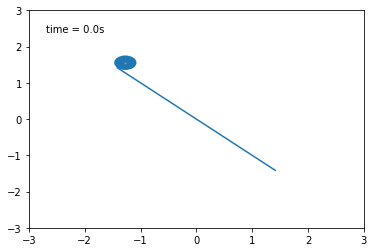

In [1]:
# PROVA DI VISUALIZZAZIONE SFUTTANDO LA LIBRERIA ESTERNA visualization.py

import visualization
import numpy as np

angle = np.linspace(-np.pi/4 , np.pi/4 , 100)
position = np.linspace(-2 , 2 , 100)

visualization.animate( 3 , 3 , 50 , 0.2 , 4 , 0.01 , angle , position)